In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
#import the requets library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db1bbe417f9305121b331358b549863b


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | christchurch
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 4 of Set 1 | uray
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | ahuimanu
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | matadi
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | pafos
Processing Record 13 of Set 1 | kupang
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | melo
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | mount gambier
Processing Record 23 of Set 1 | upern

Processing Record 37 of Set 4 | chumikan
Processing Record 38 of Set 4 | guayanilla
Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | chateau-gontier
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | port-cartier
Processing Record 45 of Set 4 | nguiu
City not found. Skipping...
Processing Record 46 of Set 4 | ponta delgada
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | opuwo
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | miyako
Processing Record 3 of Set 5 | severo-yeniseyskiy
Processing Record 4 of Set 5 | conceicao do araguaia
Processing Record 5 of Set 5 | waipawa
Processing Record 6 of Set 5 | douglas
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | knysna
Processing Record 9

Processing Record 28 of Set 8 | aksu
Processing Record 29 of Set 8 | longyearbyen
Processing Record 30 of Set 8 | kutum
Processing Record 31 of Set 8 | karachi
Processing Record 32 of Set 8 | grand centre
City not found. Skipping...
Processing Record 33 of Set 8 | gainesville
Processing Record 34 of Set 8 | kalemie
Processing Record 35 of Set 8 | yulara
Processing Record 36 of Set 8 | hualmay
Processing Record 37 of Set 8 | san marcos de colon
Processing Record 38 of Set 8 | ormara
Processing Record 39 of Set 8 | galveston
Processing Record 40 of Set 8 | gimbi
Processing Record 41 of Set 8 | toliary
City not found. Skipping...
Processing Record 42 of Set 8 | svetlogorsk
Processing Record 43 of Set 8 | atambua
Processing Record 44 of Set 8 | aswan
Processing Record 45 of Set 8 | nelson bay
Processing Record 46 of Set 8 | gura foii
Processing Record 47 of Set 8 | eenhana
Processing Record 48 of Set 8 | lata
Processing Record 49 of Set 8 | salalah
Processing Record 50 of Set 8 | juarez
Pr

Processing Record 18 of Set 12 | crawfordsville
Processing Record 19 of Set 12 | yar-sale
Processing Record 20 of Set 12 | bulgan
Processing Record 21 of Set 12 | bailieborough
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | carnot
Processing Record 24 of Set 12 | southbridge
Processing Record 25 of Set 12 | marzuq
Processing Record 26 of Set 12 | tupik
Processing Record 27 of Set 12 | meyungs
City not found. Skipping...
Processing Record 28 of Set 12 | bolivar
Processing Record 29 of Set 12 | betong
Processing Record 30 of Set 12 | termiz
Processing Record 31 of Set 12 | vozrozhdeniye
Processing Record 32 of Set 12 | arlit
Processing Record 33 of Set 12 | promysla
City not found. Skipping...
Processing Record 34 of Set 12 | la maddalena
Processing Record 35 of Set 12 | kumphawapi
Processing Record 36 of Set 12 | fernley
Processing Record 37 of Set 12 | mindelo
Processing Record 38 of Set 12 | emerald
Processing Record 39 of Set 12 | muroto
Processing 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Christchurch,-43.53,172.63,46.99,93,0,1.12,NZ,2020-05-26 22:53:51
1,Ushuaia,-54.80,-68.30,48.20,61,75,4.59,AR,2020-05-26 22:55:29
2,Uray,60.12,64.78,46.56,71,59,0.69,RU,2020-05-26 22:57:57
3,Ponta Do Sol,32.67,-17.10,66.99,76,100,1.95,PT,2020-05-26 22:55:42
4,Ahuimanu,21.44,-157.84,84.20,62,98,9.17,US,2020-05-26 22:57:58
5,Rikitea,-23.12,-134.97,74.95,82,94,17.81,PF,2020-05-26 22:55:30
6,Vostok,46.49,135.88,51.85,79,16,2.39,RU,2020-05-26 22:56:47
7,Matadi,-5.82,13.45,75.24,84,83,3.29,CD,2020-05-26 22:57:58
8,Pevek,69.70,170.31,34.12,88,10,7.38,RU,2020-05-26 22:55:49
9,Ribeira Grande,38.52,-28.70,65.26,87,19,3.29,PT,2020-05-26 22:55:47


In [14]:
#Correct the column order.
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df=city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Christchurch,NZ,2020-05-26 22:53:51,-43.53,172.63,46.99,93,0,1.12
1,Ushuaia,AR,2020-05-26 22:55:29,-54.80,-68.30,48.20,61,75,4.59
2,Uray,RU,2020-05-26 22:57:57,60.12,64.78,46.56,71,59,0.69
3,Ponta Do Sol,PT,2020-05-26 22:55:42,32.67,-17.10,66.99,76,100,1.95
4,Ahuimanu,US,2020-05-26 22:57:58,21.44,-157.84,84.20,62,98,9.17
...,...,...,...,...,...,...,...,...,...
558,Ambilobe,MG,2020-05-26 22:59:19,-13.20,49.05,66.47,84,0,3.40
559,Vikarabad,IN,2020-05-26 22:59:19,17.33,77.90,88.00,58,40,3.36
560,Leh,IN,2020-05-26 22:59:19,34.17,77.58,44.26,46,83,9.82
561,Sistranda,NO,2020-05-26 22:56:46,63.73,8.83,48.20,87,40,16.11


In [15]:
# Create the output file.csv.
output_data_file= "weather_data/cities.csv"

#Export the city data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# EPlot Latitude vs. Temperature

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1590533961.0874805

In [18]:
today=time.strftime('%x')
today

'05/26/20'

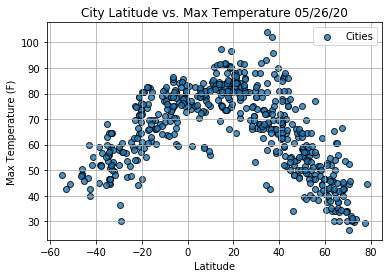

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

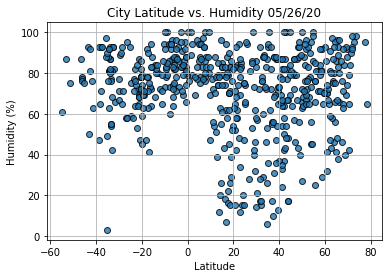

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

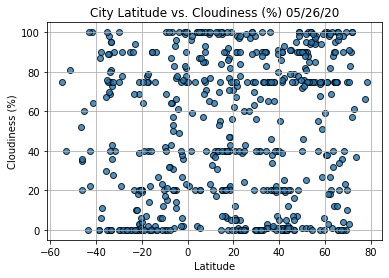

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

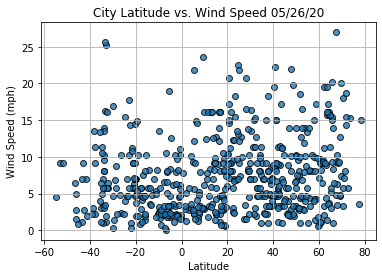

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

index13

City              Bambous Virieux
Country                        MU
Date          2020-05-26 22:55:32
Lat                        -20.34
Lng                         57.76
Max Temp                     73.4
Humidity                       78
Cloudiness                     20
Wind Speed                   6.93
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Uray,RU,2020-05-26 22:57:57,60.12,64.78,46.56,71,59,0.69
3,Ponta Do Sol,PT,2020-05-26 22:55:42,32.67,-17.10,66.99,76,100,1.95
4,Ahuimanu,US,2020-05-26 22:57:58,21.44,-157.84,84.20,62,98,9.17
6,Vostok,RU,2020-05-26 22:56:47,46.49,135.88,51.85,79,16,2.39
8,Pevek,RU,2020-05-26 22:55:49,69.70,170.31,34.12,88,10,7.38


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

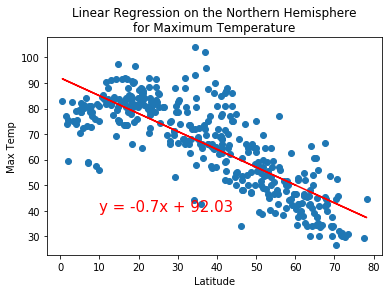

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))



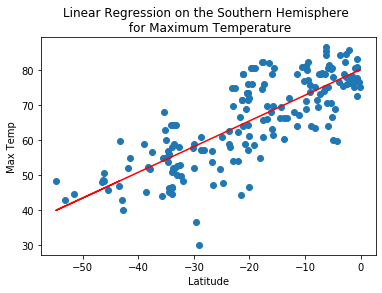

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


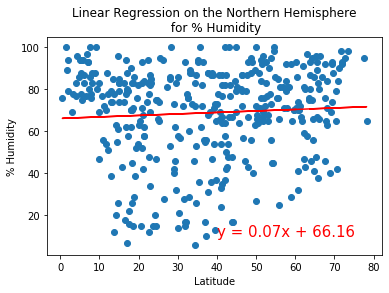

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

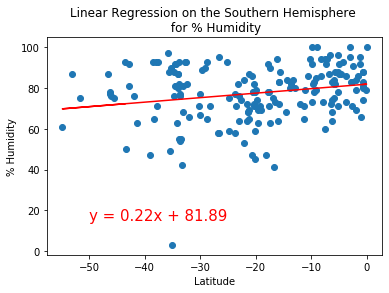

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

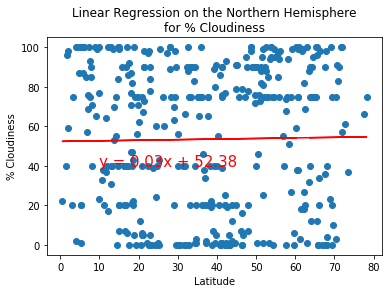

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(10,40))



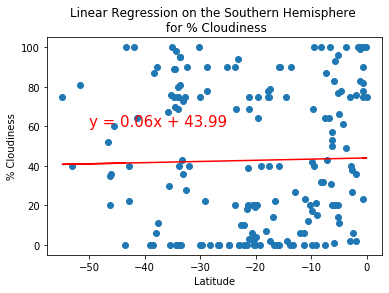

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

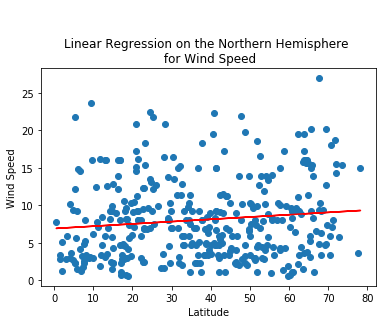

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

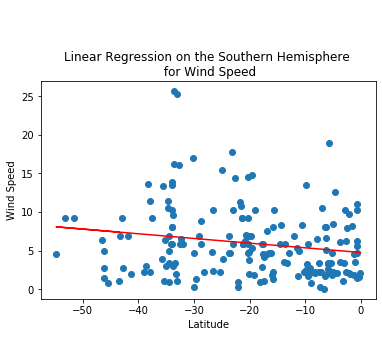

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))